In [1]:
from patchedimage import PatchedImage

In [2]:
imgp = PatchedImage("images/lena.tif",4)
imgp.set_priorities()

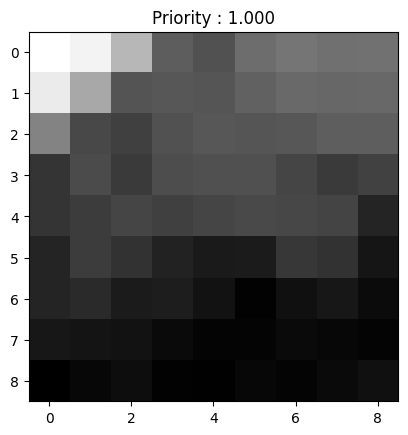

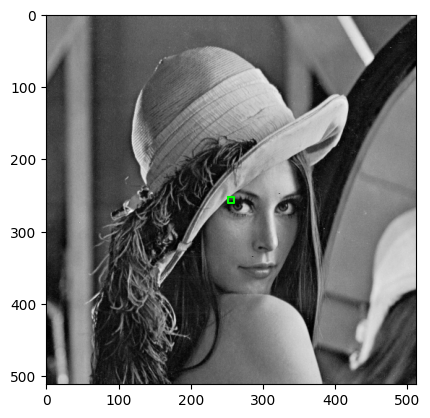

In [3]:
imgp.show_patch((256,256))

imgp.show_patch_in_img((256,256))

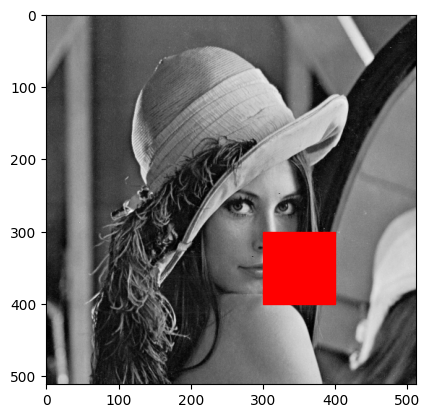

In [4]:
imgp.set_masque((300,300),(400,400))
imgp.show_img()

In [7]:
imgp.set_priorities()

In [19]:
print(imgp.priority[300,300])
print(imgp.priority[350,350])

0.6025262202420159
0.0
